# Prosper Loan Data
## by (Shubhangi)

> This project investigates the data from Prosper Loan which is a lending platform(Peer-to-Peer).The data set provides for various credentials such as *Term*, *Status of the loan*, *Amount*, *Interest charged*, *delinquency* , *Credit ratings* etc.
Some financial jargons too appear as column headers. These will be simplified for the viewers as we encounter them below.
> As they say that you should start with an *end* in mind. So the goal of the project is to determine the factors that affect the *loan outcome status* and *are we charging the loanees appropriately*. We would explore the data in order to analyze and use explanatory data analysis to summarize its main characteristics using visual methods.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Gathering

In [2]:
#Loading the data
loan = pd.read_csv('prosperLoanData.csv')

#### Assessing

In [3]:
#Exploring the structure of the data
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loan.shape

(113937, 81)

In [5]:
loan.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

The dataframe has 113937 rows and 81 columns.

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### What is the structure of your dataset?

> The dataset has 113937 entries and deals with 81 variables.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are:
1. What factors affect the loan's outcome status? *Does it depend on Credit scores, purpose of the loan, term of the loan, Income Range of the loanee?*
2. What factors affect the Borrower's APR i.e. Annualized Payment Rate? *Are some borrowers more credit-worthy that others?  How far is it justified?* 
3. Are there differences between loans depending on how large the loan amount was?*Are larger loans less predictable and riskier or vice-versa? Does the number of investors funding a loan have any impact on diversification/mitigation of risk?*

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The analysis will revolve primarily around the following variables:

1. *Loan Status* : The current status of the loan: Cancelled,  Chargedoff,  Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
2. *BorrowerAPR* : The Borrower's Annual Percentage Rate (APR) for the loan. This is equal to BorrowerRate + Loan Processing Charges.
3. *Term of the Loan* 
4. *Employment Status of the loanee*
5. *Credit Score Range* 
6. *Income range*
7. *Purpose of the loan*
8. *Debt to Income ratio* : The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
9. *Original Amount of the Loan*
12. *Amount Delinquent*
13. *Prosper ratings* : The Prosper Rating assigned at the time the listing was created between AA - HR, with 'AA' being the best rating and 'HR' being the worst..  Applicable for loans originated after July 2009. 
14. *Investors* : Number of Investors who funded the loan.
15. *Lender Yield*

#### Observations:


1. Missing data : There are many columns which have missing/ null data. This can be divided into three categories:
a. Severe : like *Credit Grade*, *Estimated Effective Yield*, *Estimated loss*, *Estimated return*, *Total Prosper loans*, *Total Prosper Payments Billed*, *On Time Prosper Payments, ScorexChangeAtTimeOfListing*.
b. Moderate : *Prosper rating*, *Revolving Credit balance* ,*Debt to Income Ratio* has 8554 missing values. *EmploymentStatus* has 2255 missing entries.
c. Minimal : like *Borrower APR* has 25 missing observations; *Credit score range (lower and upper)* has 591 missing entries,  . We will try to fix this as far as possible.

2. *Income Range,  Prosper rating*  is a string: should be categorical.
3. Listing Category which gives tells us the purpose of the loan is 'int'. Also change its name from *ListingCategory (int)* to *PurposeOfLoan*.
4. The *EmploymentStatus* has redundant categories.
5. Junk/ unnecessary data for analysis : These data are mostly for administrative functions and have no relevance for data analysis : *IsBorrowerHomeOwner, CurrentlyInGroup, GroupKey, DateCreditPulled, FirstRecordedCreditLine, InquiriesLast6Months, TotalInquiries, BankCardUtlization, TotalTrades, TradesNeverDelinquent, TradesOpenedLast6Months, LoanOriginalDate, LoanOriginalQuarter, BorrowerState*



#### Cleaning:

##### Define : 
1. Drop the columns not needed for the analysis. Also, drop some of the columns that have a lot of missing data and aren't relevant to our analysis.(Or if we are able to capture the same essence using other variables like :ScorexChangeAtTimeOfListing is being dropped. We will analyze the credit worthiness using other parameters available.
2. **Data Imputation** : BorrowAPR = BorrowerRate + (some sort of)loan processing charges. We can find this loan processing charges by subtracting BorrowerAPR with BorrowerRate and find out the median processing charges. Then add this value to the BorrowerRate to find out the BorrowerAPR of the missing data. 
3. *ProsperRating* : The Prosper Rating assigned at the time the listing was created between AA - HR. Convert it into a **categorical variable** and **fill null values as "unrated".**
4. For analyzing the data in a better manner, convert both *CreditScoreRangeLower* and *CreditScoreRangeUpper* into strings and thereafter merge them into a single column *CreditScore*. This is being done because the Credit scores essentially point towards quality and hence can be treated as qualitative data. Also, organize this column into a **categorical data type**.
5. Convert *IncomeRange* into a **categorical variable**.
6. Create a column which shows the purpose of the loan from the *ListingCategory (numeric)* : replace the numerals with what they signify and merge the categories '11' and '20' into a single category of 'wedding loans'.
7. **Fill the null values of *EmploymentStatus* with 'NA'** and merge this with 'Not Available'. Also, merge 'Self-employed', 'Employed','Full-time', 'Part-time' into a single category.
8. *LoanStatus* should be converted into a **Categorical type variable** .Merge 'ChargedOff' and 'Completed' ; Past Due (1-15 days) and Past Due(15-30 days) because all other payment delay categories have a uniform difference of 30 days.


In [7]:
# Create a copy of the data for cleaning
loan_clean = loan.copy()

In [8]:
#Code : 1
#Drop columns not needed for analysis
loan_clean.drop(['IsBorrowerHomeowner','BorrowerState', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled','TotalCreditLinespast7years','FirstRecordedCreditLine', 'TotalTrades', 'TradesNeverDelinquent (percentage)','TradesOpenedLast6Months', 'InquiriesLast6Months','TotalInquiries', 'ListingKey', 'ListingCreationDate', 'PublicRecordsLast10Years','PublicRecordsLast12Months','LoanKey','MemberKey'], axis = 1, inplace = True)

loan_clean.drop(['ClosedDate', 'CreditGrade', 'LoanFirstDefaultedCycleNumber', 'InvestmentFromFriendsCount','InvestmentFromFriendsAmount', 'ScorexChangeAtTimeOfListing', 'EmploymentStatusDuration'], axis = 1, inplace = True)

In [9]:
#Assessing : 1
loan_clean.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,Investors
0,193129,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,...,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,258
1,1209647,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,1
2,81716,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,...,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,41
3,658116,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,...,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,158
4,909464,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,...,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,20


**Let us now try to fix the null values for the variables which are important for the analysis.**

In [10]:
#Code : 2
#Data imputation
processing_charge = loan.BorrowerAPR - loan.BorrowerRate
processing_charge.median()

0.025019999999999987

In [11]:
# Code : 2.1
# Filling null values with the sum of BorrowerRate and median processing charges
loan_clean.BorrowerAPR.fillna(loan_clean.BorrowerRate + processing_charge.median(), inplace = True)

In [12]:
#Assessing : 2
sum(loan_clean.BorrowerAPR.isnull())

0

In [13]:
#Code : 3
#Fill the null values as "Unrated"
loan_clean['ProsperRating (Alpha)'].fillna('Unrated', inplace = True)

#Converting it into a categorical variable type
# Defining the categories:
rating_class = ['AA','A','B','C','D','E','HR','Unrated'] 
r_classes = pd.api.types.CategoricalDtype(ordered = True, categories = rating_class)
loan_clean['ProsperRating (Alpha)'] = loan_clean['ProsperRating (Alpha)'].astype(r_classes);

In [14]:
#Assesing : 3
loan_clean['ProsperRating (Alpha)'].dtype

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'Unrated'], ordered=True)

In [15]:
#Code : 4
#Converting the columns into strings and dropping the '.0'
loan_clean.CreditScoreRangeLower= loan_clean.CreditScoreRangeLower.astype(str).str[:-2]
loan_clean.CreditScoreRangeUpper = loan_clean.CreditScoreRangeUpper.astype(str).str[:-2]

#Merging the two columns
merge = lambda row : row['CreditScoreRangeLower'] + str('-') + row['CreditScoreRangeUpper']
loan_clean['CreditScore'] = loan_clean.apply(merge, axis =1)

#Now we can drop the parent columns:
loan_clean.drop(['CreditScoreRangeLower','CreditScoreRangeUpper'], axis = 1, inplace = True)

In [16]:
#Code : 4.1 
#Converting the column into a categorical data type
#Ordering the various categories in CreditScore
loan_clean.CreditScore.unique()
credit_order = ['0-19','360-379','420-439','440-459','460-479','480-499','500-519','520-539','540-559','560-579','580-599','600-619','620-639','640-659','660-679','680-699','700-719','720-739','740-759','760-779','780-799','800-819','820-839','840-859','860-879','880-899','n-n']
credit_cat = pd.api.types.CategoricalDtype(ordered = True, categories = credit_order)
loan_clean.CreditScore = loan_clean.CreditScore.astype(credit_cat)
                

In [17]:
#Assessing : 4
loan_clean.CreditScore.dtype

CategoricalDtype(categories=['0-19', '360-379', '420-439', '440-459', '460-479',
                  '480-499', '500-519', '520-539', '540-559', '560-579',
                  '580-599', '600-619', '620-639', '640-659', '660-679',
                  '680-699', '700-719', '720-739', '740-759', '760-779',
                  '780-799', '800-819', '820-839', '840-859', '860-879',
                  '880-899', 'n-n'],
                 ordered=True)

In [18]:
# Code : 5
# Check for unique values in this column
loan_clean.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [19]:
#Code : 5
# Since 'Not employed' and '$0' mean the same thing, replacing these two values as '$0'
income_type = ['Not employed', '$0']
for phrase in income_type:
    loan_clean.IncomeRange.replace(to_replace = phrase, value = '$0', inplace = True)
    
# Ordering the categories in Income Range
Income_classes = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']

#Converting it into a categorical variable
Income_order = pd.api.types.CategoricalDtype(ordered = True, categories = Income_classes)
loan_clean['IncomeRange'] = loan_clean['IncomeRange'].astype(Income_order)

In [20]:
#Assessing : 5
loan_clean.IncomeRange.unique()

[$25,000-49,999, $50,000-74,999, Not displayed, $100,000+, $75,000-99,999, $1-24,999, $0]
Categories (7, object): [$0 < $1-24,999 < $25,000-49,999 < $50,000-74,999 < $75,000-99,999 < $100,000+ < Not displayed]

In [21]:
#Code : 6
# Listing Category consists of details of purpose of loan, simplifying this and converting the integers into strings of what they actually stand for

loan_clean.replace(to_replace ={'ListingCategory (numeric)':{0: 'Unknown', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}}, inplace = True)

#Renaming the column for simplification:
loan_clean.rename(columns={'ListingCategory (numeric)' : 'PurposeOfLoan'}, inplace = True)

#Merging the 'Engagment Ring loans' and 'Wedding loans'
category = ['Engagement Ring', 'Wedding Loans']
for phrase in category:
    loan_clean.PurposeOfLoan.replace(to_replace = phrase, value = 'Wedding loan', inplace = True)

In [22]:
#Assessing : 6
loan_clean.PurposeOfLoan.nunique()#there should be 20 unique values unlike the earlier 21 distinct categories.

20

In [23]:
#Code : 7
# Fill null vaues with NA : Not Available
loan_clean.EmploymentStatus.fillna('NA', inplace = True)
type1 = ['NA','Not available']
type2 = ['Employed','Self-employed', 'Full-time', 'Part-time']
for phrase in type1:
    loan_clean.EmploymentStatus.replace(to_replace = phrase, value = 'NA', inplace = True)
for phrase in type2:
    loan_clean.EmploymentStatus.replace(to_replace = phrase, value = 'Employed', inplace = True)

In [24]:
#Assessing : 7
loan_clean.EmploymentStatus.unique()

array(['Employed', 'NA', 'Other', 'Not employed', 'Retired'], dtype=object)

In [25]:
#Code : 8
#Reducing redundancies in LoanStatus column :
# Completed and Chargedoff mean the same thing.
type_status1 = ['Chargedoff','Completed']

# For better uniformity, merging Past Due(1-15)days and Past Due(16-30) days into Past Due(1 -30) days
type_status2 = ['Past Due (1-15 days)', 'Past Due (16-30 days)']

for phrase in type_status1:
    loan_clean.LoanStatus.replace(to_replace = phrase, value = 'Chargedoff', inplace = True)
for phrase in type_status2:
    loan_clean.LoanStatus.replace(to_replace = phrase, value = 'Past Due (1-30 days)', inplace = True)

#Converting it into a categorical type variable
loan_order = ['Chargedoff','FinalPaymentInProgress','Current','Past Due (1-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Defaulted']
loan_status = pd.api.types.CategoricalDtype(ordered = True, categories = loan_order)
loan_clean.LoanStatus = loan_clean.LoanStatus.astype(loan_status)

In [26]:
#Assessing : 8
loan_clean.LoanStatus.value_counts()

Current                   56576
Chargedoff                50066
Defaulted                  5018
Past Due (1-30 days)       1071
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
FinalPaymentInProgress      205
Name: LoanStatus, dtype: int64

## Basic exploration

In [27]:
loan_clean.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,Investors,CreditScore
0,193129,36,Chargedoff,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,...,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,258,640-659
1,1209647,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,...,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,1,680-699
2,81716,36,Chargedoff,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,...,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,41,480-499
3,658116,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,...,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,158,800-819
4,909464,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,...,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,20,680-699


In [28]:
loan_clean.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,Investors
count,1.139370e+05,113937.000000,113937.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218805,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,80.475228
std,3.280762e+05,10.436212,0.080372,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,500.890000,274.870000,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209710,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,1587.500000,700.840100,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283700,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,4000.000000,1458.540000,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,35000.000000,15617.030000,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,1189.000000


## Data Engineering

1. Creating a column *CostofBorrowing* by subtracting BorrowerAPR and BorrowerRate so as to gauge what factors affect the borrowing cost. Are the costs the same for all loan types and kinds of loaness?
2. Creating a column by cuting the *LoanOrginalAmount* into 4 categories with edges as [Min, 1st quartile, 3rd quartile, Max] so as to derive its relationship with other variables better.


In [29]:
#DA : 1
loan_clean['CostofBorrowing'] = loan_clean.BorrowerAPR - loan_clean.BorrowerRate

In [30]:
loan_clean.CostofBorrowing.head()

0    0.00716
1    0.02816
2    0.00769
3    0.02788
4    0.03764
Name: CostofBorrowing, dtype: float64

In [31]:
#DA : 2
loan_clean.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [32]:
#Creating bin edges for slicing the column into 4 divsions.
amount_edges = [1000.00000, 4000.00000, 6500.00000, 12000.00000, 35000.00000]

#Labels for the four levels/categories
amount_labels = ['1000-4000', '4000-6500', '6500-12000', '12000-35000']
loan_clean['LoanSize'] = pd.cut(loan_clean.LoanOriginalAmount, amount_edges, labels = amount_labels)

In [33]:
loan_clean.LoanSize.head()

0     6500-12000
1     6500-12000
2      1000-4000
3     6500-12000
4    12000-35000
Name: LoanSize, dtype: category
Categories (4, object): [1000-4000 < 4000-6500 < 6500-12000 < 12000-35000]

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

We would start the univariate exploration with qualitative variables : 
1. Ordinal :*ProsperRating (Alpha), LoanStatus, IncomeRange, CreditScore, LoanSize*
2. Nominal : *PurposeOfLoan, EmploymentStatus*

In [34]:
#Defining base color
base_color = sns.color_palette()[0]

In [35]:
#Creating a function to minimize manual iteration
def graph_label(x ,y,title):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    
# Creating the figure size:
def graph_size(x,y):
    plt.figure(figsize=(x,y))

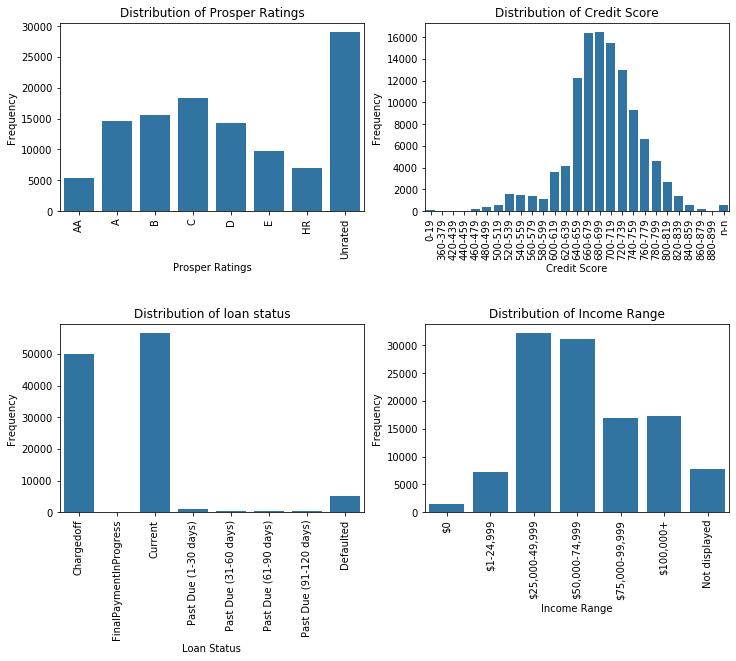

In [122]:
# Plots of ProsperRating (Alpha), CreditScore, LoanStatus and Income Range ; all of which are categorical variables.
# Categorical variables are best represented through bar charts.
graph_size(12,10)
plt.subplot(2,2,1)
sns.countplot(data = loan_clean, x = 'ProsperRating (Alpha)', color = base_color);
plt.xticks(rotation = 90)
graph_label('Prosper Ratings', 'Frequency', 'Distribution of Prosper Ratings')
plt.subplot(2,2,2)
sns.countplot(data = loan_clean, x = 'CreditScore', color = base_color);
plt.xticks(rotation = 90)
graph_label('Credit Score', 'Frequency', 'Distribution of Credit Score')
plt.subplot(2,2,3)
sns.countplot(data = loan_clean , x ='LoanStatus', color = base_color);
plt.xticks(rotation = 90)
graph_label('Loan Status', 'Frequency', 'Distribution of loan status')
plt.subplot(2,2,4)
sns.countplot(data = loan_clean , x ='IncomeRange', color = base_color);
plt.xticks(rotation = 90)
graph_label('Income Range', 'Frequency', 'Distribution of Income Range')

#adjusting the vertical and horizontal heights :
plt.subplots_adjust(hspace = 0.6, bottom = 0.2)




##### Observations:
1. *ProsperRating* : Most of the loans are unrated. This shows **administrative laxacity** which offers a scope of improvement  in the future. Otherwise, the ratings are centered around A, B, C(highest other than unrated) and D grades.
2. *CreditScore* : Maximum loans have a decent Credit score falling in the range of 660-719. Although as the bar chart suggests, it is slightly left-skewed i.e., more number of loans fall under average or low credit scores than very high ones.
3. *LoanStatus* : Majority of the loans are under the current status (56576) though many loans have been charged off , we do find that around 5018 loans are under the Default category and 1071 are  30 days past their interest/principal payments. *Chargedoff* and *Defaulted* can give us key insights on what trends determine the loan outcome status.
4. *IncomeRange* : As we can see that most of the loanees fall under the middle-income group. There are some entries in which Income range is not mentioned. This needs further investigation.

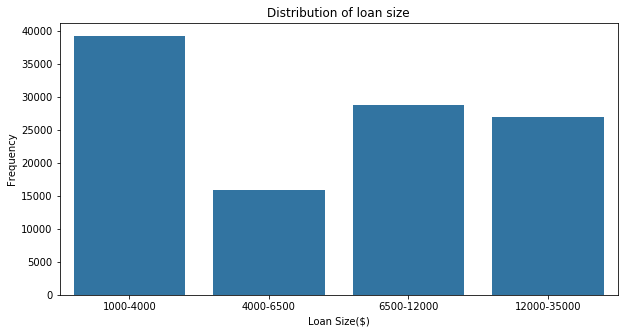

In [120]:
#Plotting the variable 'LoanSize'
graph_size(10,5)
sns.countplot(data = loan_clean, x = 'LoanSize', color = base_color);
graph_label('Loan Size($)', 'Frequency', 'Distribution of loan size')

As we can see : Majority of the loans fall in the range of (1000 -4000) dollars that is : small sized loans. The next big category is (6500 - 12000) with $(4000 - 6500) falling in the least prefered range.

> Let us know look at the nominal data types

In [38]:
#Since we are plotting nominal variables, the graph should display it in order of frequency:
purpose_order = loan_clean.PurposeOfLoan.value_counts().index

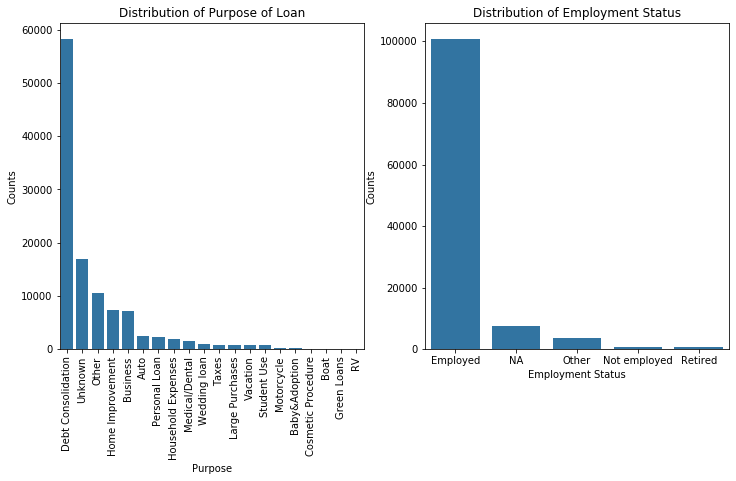

In [173]:
graph_size(12,6)
plt.subplot(1,2,1)
sns.countplot(data = loan_clean, x = 'PurposeOfLoan', color = base_color, order = purpose_order);
plt.xticks(rotation = 90)
graph_label('Purpose', 'Counts', 'Distribution of Purpose of Loan')
plt.subplot(1,2,2)
sns.countplot(data = loan_clean, x = 'EmploymentStatus', color = base_color);
graph_label('Employment Status', 'Counts', 'Distribution of Employment Status')

##### Observations:
1. *PurposeOfLoan* : The above graph shows us that maximum number of loans are towards the purpose of "Debt1 Consolidation". Debt Consolidation means : consolidating all existing liabilities(loans) using unsecured ones with a loan. Debt consolidation loans don't erase the original debt but transfer a consumer's loans to a different lender or a type of a loan. Also, a huge chunk of loan is taken for 'Unknown' purposes, this needs further investigation as to how this affects the other variables.
2. *EmploymentStatus* : This shows that most of the loanees are employed. While the employment status of some people are unavailable. Few loans are taken by the 'Not employed' (probably student loans) and the 'Retired' sections as well.

Univariate analysis for quantitative data :
*BorrowerAPR, DebtToIncomeRatio, LoanOriginalAmount, LenderYield, CostofBorrowing, Term* and *Investors*

In [181]:
loan_clean.BorrowerAPR.describe()

count    113937.000000
mean          0.218805
std           0.080372
min           0.006530
25%           0.156290
50%           0.209710
75%           0.283700
max           0.512290
Name: BorrowerAPR, dtype: float64

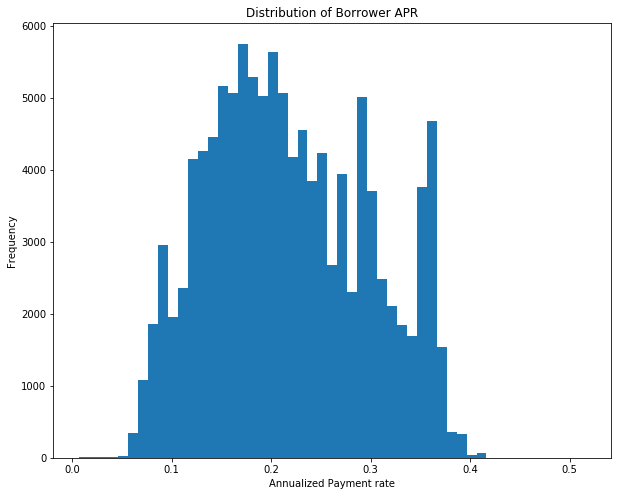

In [44]:
plt.figure(figsize=(10,8))
APR_bins = np.arange(loan_clean.BorrowerAPR.min(), loan_clean.BorrowerAPR.max() +0.01, 0.01)
plt.hist(data = loan_clean, x = 'BorrowerAPR', bins = APR_bins)
graph_label('Annualized Payment rate','Frequency','Distribution of Borrower APR')

The distribution of Borrower's Annualized Payment rate is roughly unimodal peaking between (15 - 20)%. However one can observe peaks at rates around 30% and 35%.

In [40]:
loan_clean.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

(0, 1.5)

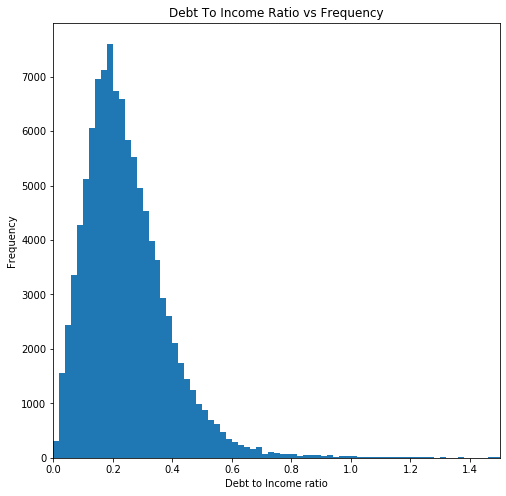

In [42]:
graph_size(8,8)
bin_edges = np.arange(0, 10.01 + 0.02, 0.02)
plt.hist(data = loan_clean, x= 'DebtToIncomeRatio', bins = bin_edges)
graph_label('Debt to Income ratio', 'Frequency', 'Debt To Income Ratio vs Frequency')
plt.xlim((0,1.5))


>The graph for Debt to Income Ratio is right skewed. There is an outlier of 10.0(which means the person has 10 times the loan as the respective Income)
>The graph peaks at 0.15 to 0.35 i.e., most of the loanees have around 15-35% of their incomes as loan.

In [46]:
loan_clean.LenderYield.describe()

count    113937.000000
mean          0.182701
std           0.074516
min          -0.010000
25%           0.124200
50%           0.173000
75%           0.240000
max           0.492500
Name: LenderYield, dtype: float64

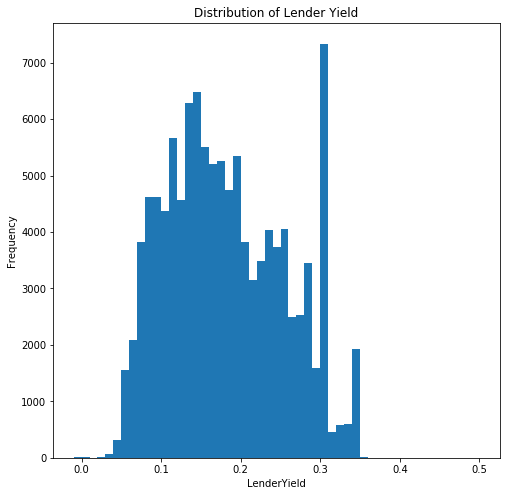

In [47]:
plt.figure(figsize=(8,8))
yield_edges = np.arange(loan_clean.LenderYield.min(), loan_clean.LenderYield.max()+ 0.01, 0.01)
plt.hist(data = loan_clean, x = 'LenderYield', bins = yield_edges)
graph_label('LenderYield', 'Frequency', 'Distribution of Lender Yield')

The distribution is bi-modal with maximum numbers seen between (12 - 18)%, however the graph peaks again at 30% yield.

In [119]:
loan_clean.CostofBorrowing.describe()

count    113937.000000
mean          0.026041
std           0.012377
min           0.000000
25%           0.019000
50%           0.025020
75%           0.036530
max           0.149350
Name: CostofBorrowing, dtype: float64

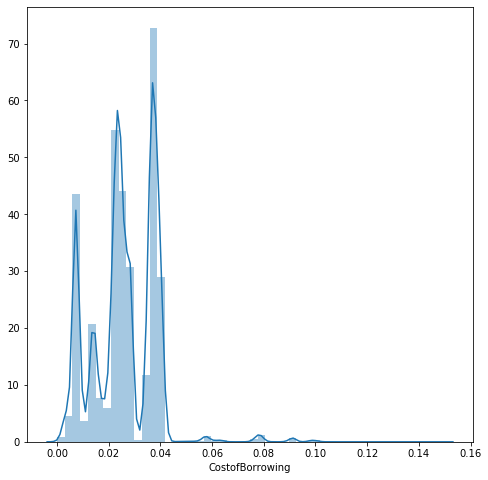

In [49]:
plt.figure(figsize=(8,8))

sns.distplot(loan_clean['CostofBorrowing'])

The distribution of Cost of Borrowing is multimodal with most of loanees having (2 - 4)% of the loan's amount as borrowing expense apart from the interest of the loan.

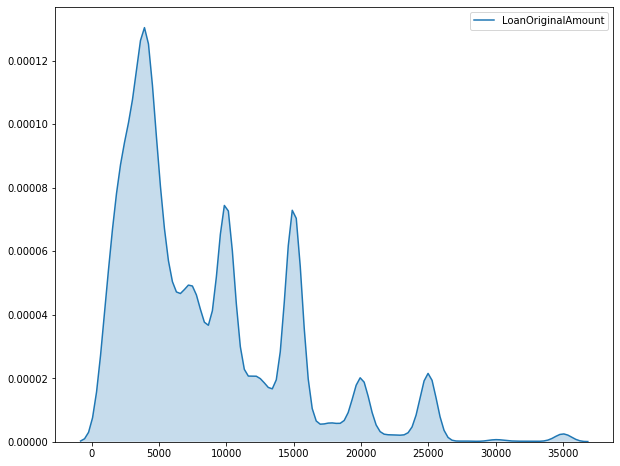

In [51]:
plt.figure(figsize=(10,8))
sns.kdeplot(data = loan_clean['LoanOriginalAmount'], shade = True)

In [145]:
def cuberoot_trans(x, inverse = False):
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

loan_clean['Loan_cubic'] = loan_clean['LoanOriginalAmount'].apply(cuberoot_trans)


In [146]:
loan_clean.Loan_cubic.describe()

count    113937.000000
mean         19.053367
std           4.925703
min          10.000000
25%          15.874011
50%          18.662556
75%          22.894285
max          32.710663
Name: Loan_cubic, dtype: float64

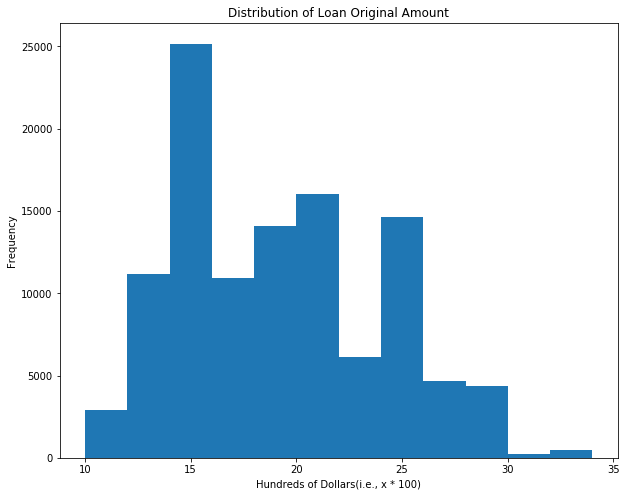

In [170]:
plt.figure(figsize=(10,8))
bin_loan_original = np.arange(10, 32.710663+ 2, 2)
plt.hist(data = loan_clean, x = 'Loan_cubic', color = base_color, bins = bin_loan_original);
graph_label('Hundreds of Dollars(i.e., x * 100)', 'Frequency', 'Distribution of Loan Original Amount')


The distribution of Loan Original Amount is multi-modal : most of loans are small sized loans betwen $(1000 - 4000).

In [123]:
loan_clean.Investors.describe()

count    113937.000000
mean         80.475228
std         103.239020
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: Investors, dtype: float64

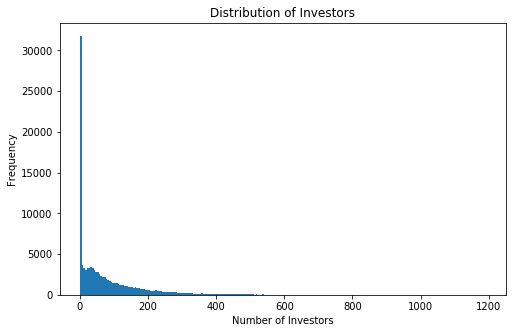

In [136]:
plt.figure(figsize = (8,5))
bin_investors = np.arange(1, 1189 + 5, 5)
plt.hist(data = loan_clean, x = 'Investors', bins = bin_investors, color = base_color);
graph_label('Number of Investors', 'Frequency', 'Distribution of Investors')

Since the graph has a long tail, we can perform log transform and test the results.

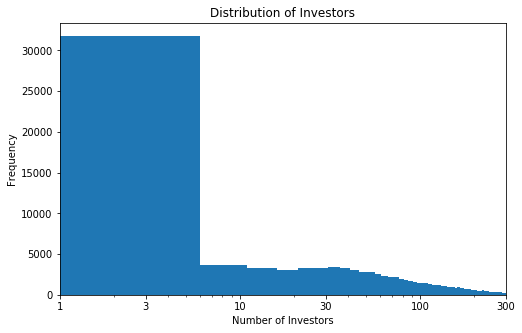

In [148]:
plt.figure(figsize = (8,5))
bin_investors = np.arange(1, 1189 + 5, 5)
plt.hist(data = loan_clean, x = 'Investors', bins = bin_investors, color = base_color);
plt.xscale('log')
tick_locs =[1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs)
plt.xlim((1,300))
graph_label('Number of Investors', 'Frequency', 'Distribution of Investors')

Majority of the loans have investors between 1- 300.

(-1.1051549867118768,
 1.1046243395023896,
 -1.1052190188111344,
 1.104560307403132)

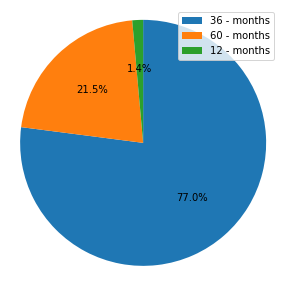

In [53]:
# Graphical representation of distribution of loan tenure.
plt.figure(figsize=(8,5))
sorted_counts = loan_clean.Term.value_counts()
plt.pie(sorted_counts, startangle = 90, counterclock = False, autopct = '%0.1f%%');
plt.legend(['36 - months', '60 - months', '12 - months'])
plt.axis('square')

Most of the loans have a 3-year tenure. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

**Yes I performed 'Log' transformation on *Investors* and 'cubic root' transform on *LoanOriginalAmount*.**

> Distributions of the variables of interest :

**Qualitative variables :**

1. *PurposeOfLoan* : The above graph shows us that maximum number of loans are towards the purpose of "Debt Consolidation".Also, a huge chunk of loan is taken for 'Unknown' purposes, this needs further investigation as to how this affects the other variables.
2. *EmploymentStatus* : This shows that most of the loanees are employed. While the employment status of some people are unavailable. Few loans are taken by the 'Not employed' (probably student loans) and the 'Retired' sections as well.
4. *ProsperRating* : Most of the loans are unrated. This shows **administrative laxacity** which offers a scope of improvement  in the future. Otherwise, the ratings are centered around **A, B, C(highest other than unrated) and D grades**.
5. *CreditScore* : Maximum loans have a decent Credit score falling in the range of **660-719**. Although as the bar chart suggests, it is slightly left-skewed i.e., more number of loans fall under average or low credit scores than very high ones.
6. *LoanStatus* : Majority of the loans are under the current status (56576) though many loans have been charged off , we do find that around 5018 loans are under the Default category and 1071 are  30 days past their interest/principal payments. *Chargedoff* and *Defaulted* can give us key insights on what trends determine the loan outcome status.
7. *IncomeRange* : As we can see that most of the loanees fall under the middle-income group. There are some entries in which Income range is not mentioned. This needs further investigation.

**Quatitative variables** :
1. *Term* : Most of the loans are long-term falling under 3 and 5 year tenures. Short term loans of 1 year tenure form a minority of the loans. 
2. *Investors* : Majority of the loans have investors between 1- 300.
3. *LoanOriginalAmount* : The distribution of Loan Original Amount is multi-modal : most of loans are small sized loans betwen dollars (1000 - 4000).
4. *CostofBorrowing*: The distribution of Cost of Borrowing is multimodal with most of loanees having (2 - 4)% of the loan's amount as borrowing expense apart from the interest of the loan.
5. *LenderYield* :The distribution is bi-modal with maximum numbers seen between (12 - 18)%, however the graph peaks again at 30% yield.
6. *BorrowerAPR*: The distribution of Borrower's Annualized Payment rate is roughly unimodal peaking between (15 - 20)%. However one can observe peaks at rates around 30% and 35%.
7. *DebtToIncome* : The graph for Debt to Income Ratio is right skewed. There is an outlier of 10.0(which means the person has 10 times the loan as the respective Income). The graph peaks at 0.15 to 0.35 i.e., most of the loanees have around 15-35% of their incomes as loan.

> Unusual Points : **Very high Borrowing rates and small loan sizes form the chunk of the data.** 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Operations adjust the data : Details of this can be found under the **Define** stage of the wrangling process.

1. Created a column which shows the purpose of the loan from the *ListingCategory (numeric)* : replaced the numerals with what they signify and merge the categories '11' and '20' into a single category of 'wedding loans'.
2. **Filled the null values of *EmploymentStatus* with 'NA'** and merged this with 'Not Available'. Also, merged 'Self-employed', 'Employed','Full-time', 'Part-time' into a single category.
3. Converted *LoanStatus* into a **Categorical type variable** .Merge 'ChargedOff' and 'Completed' ; Past Due (1-15 days) and Past Due(15-30 days) because all other payment delay categories have a uniform difference of 30 days.

> Data Engineering : As mentioned above, I have created three columns : *CostofBorrowing* , *LoanSize and CreditScore ; both of these are functions of the existing variables, however they will help us investigate the data set better.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Our foucs variables are *LoanOutcomeStatus, BorrowerAPR and LoanOriginalAmount/ Loan Size.*

In [54]:
# To depict the correlation between different quantitative variables, let us first create a subset dataframe:
subset_loan = loan_clean[['BorrowerAPR', 'DebtToIncomeRatio','LoanOriginalAmount', 'LenderYield', 'CostofBorrowing','AmountDelinquent', 'Investors' ]]

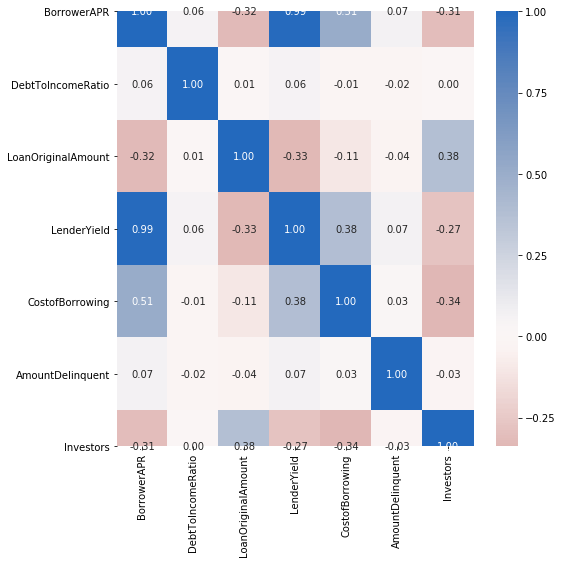

In [55]:
#Creating a heat map
# Since correlation can move either in positive or negative territory from 0, so chosing a diverging palette 'vlag_r'
graph_size(8,8)
sns.heatmap(subset_loan.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

From the above heat map, we find that :
1. Lender Yield and Borrower's interest rate (APR) have a **strong positive correlation**. This follows logically since interest rates paid by the loanees are appropriated by the lenders.
2. However for the other variables, we don't see strong correlations : This can mean either of two things: These variables are not inter-dependent or that these variables don't share a linear relationship
3. One interesting feature that we observe here is that the *Cost of Borrowing* is not strongly related to either *BorrowerAPR* or *Lender Yield*.

C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


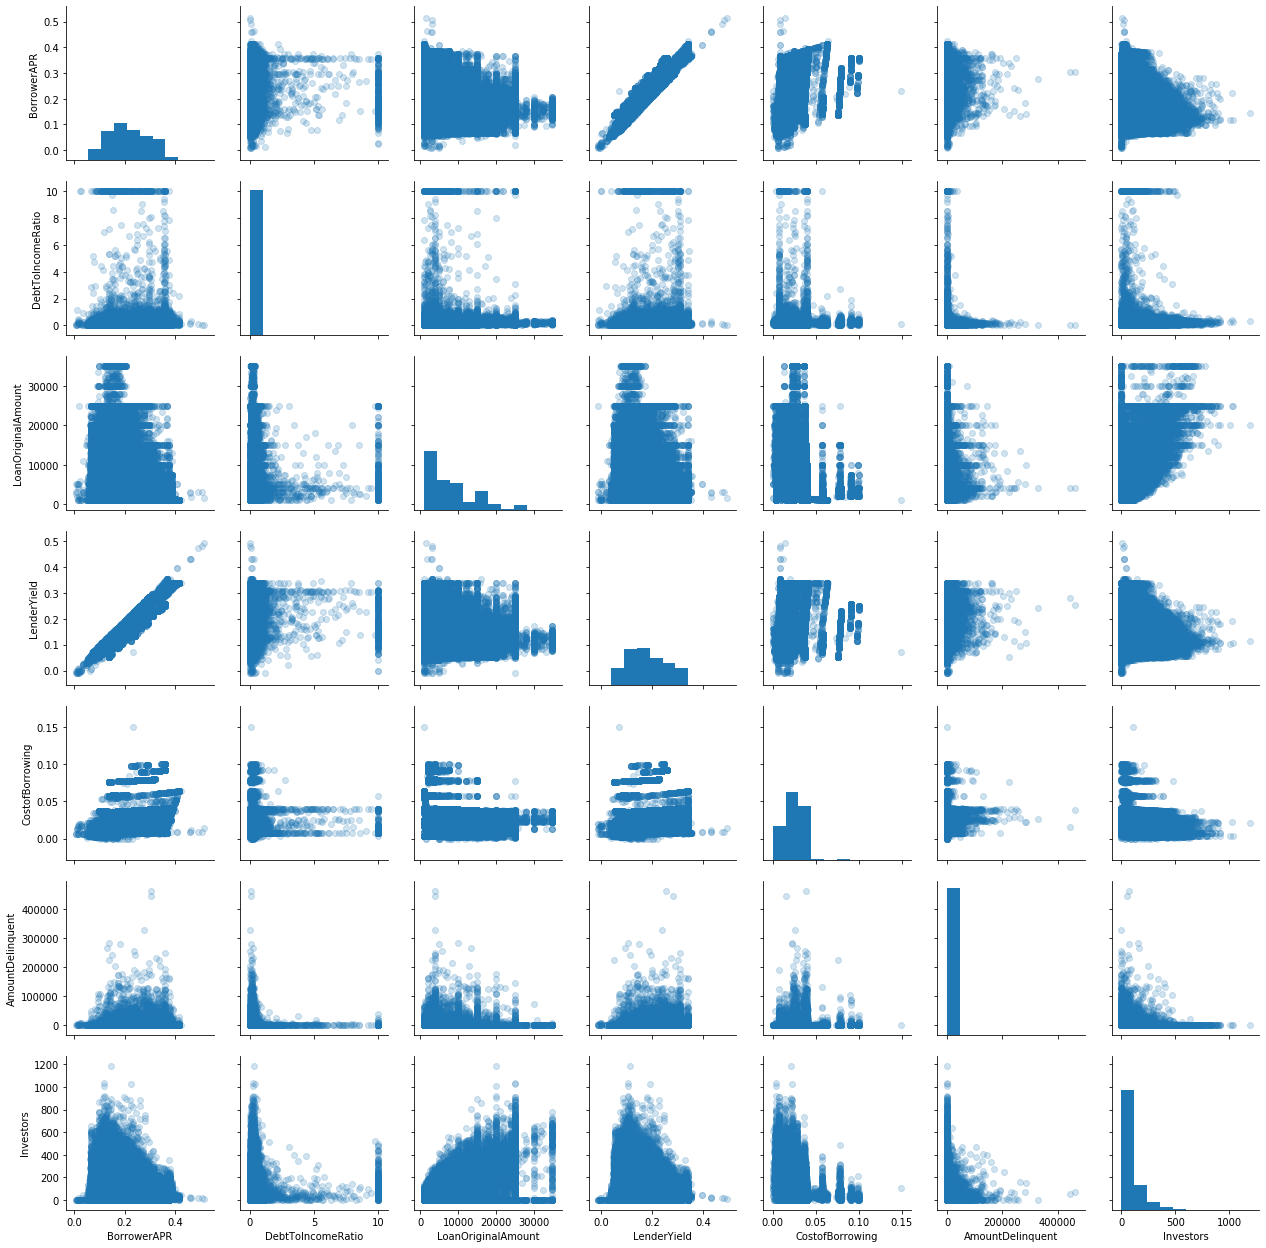

In [56]:
#Let us start with visualizing the relationships between the quantitative variables
g= sns.PairGrid(data = loan_clean, vars = ['BorrowerAPR','DebtToIncomeRatio','LoanOriginalAmount', 'LenderYield', 'CostofBorrowing','AmountDelinquent', 'Investors'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 0.2)

This is proves what we made out of the above heat map.

**BorrowerAPR* vs Qualitative variables**

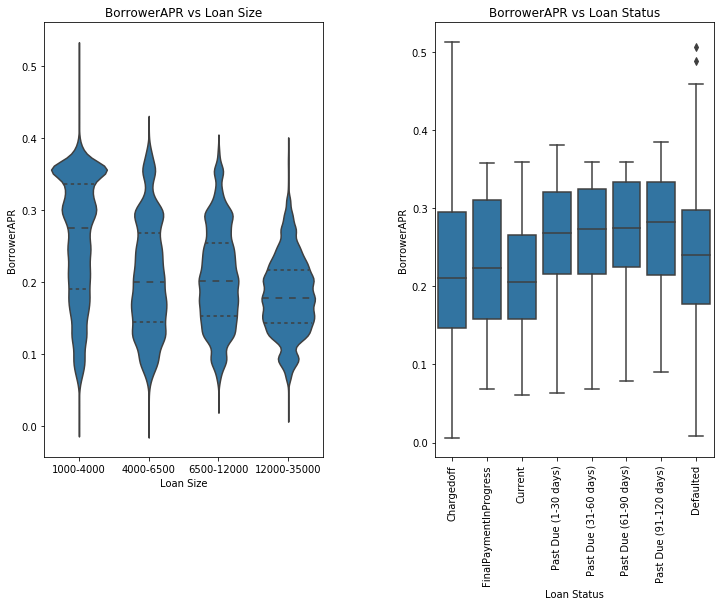

In [180]:
#BorrowerAPR vs LoanSize
graph_size(12,8)
plt.subplot(1,2,1)
sns.violinplot(data = loan_clean, x = 'LoanSize', y = 'BorrowerAPR', color = base_color, inner = 'quartile')
graph_label('Loan Size', 'BorrowerAPR', 'BorrowerAPR vs Loan Size')
plt.subplot(1,2,2)
#BorrowerAPR vs LoanStatus
sns.boxplot(data = loan_clean, x = 'LoanStatus', y = 'BorrowerAPR', color = base_color)
plt.xticks(rotation = 90)
graph_label('Loan Status', 'BorrowerAPR', 'BorrowerAPR vs Loan Status')
plt.subplots_adjust(wspace = 0.4)

The Observation from the above graph is slightly strange : 
1. *LoanStatus* : BorrowerAPR's have generally been higher in the past: as we can see that 'ChargedOff' between (15 - 30)% as interest rate, it has gone up to 50% too for some loanees. Current loans have relatively lower interest rates. Also, as the due time increases (for the payment of interest or principal), the Borrower's APR increases. The defaulted loans have lower Borrower APR than those with delays, this is because borrowers never paid their dues.
2. *LoanSize*: Anomaly : **The BorrowerAPR is higher and more variable for lower range loans**. It decreases with increase in Loan Amount. Does this mean than smaller loans are riskier, Let us investigate this:

Text(0.5, 1.0, 'Distribution of Ratings with Loan Size')

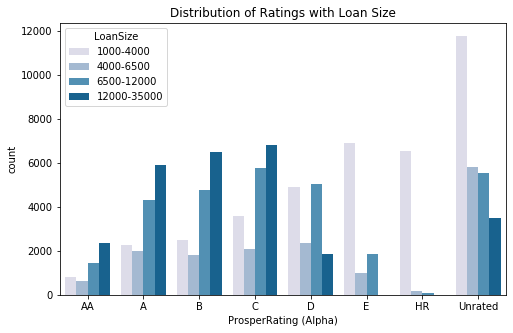

In [179]:
# Check the ratings :
graph_size(8,5)
sns.set_palette("PuBu", 4)
sns.countplot(data = loan_clean, x = 'ProsperRating (Alpha)', hue = 'LoanSize');
plt.title('Distribution of Ratings with Loan Size')

The anomaly of higher Borrower interest rates for lower loan sizes can be explained by the above graph. As we can see here that a major chunk of loans are not classified, with small loan size of (1000 - 4000) has the highest proportion of low ratings plus a huge chunk of these loans fall under the "unrated" category which points to a potential risk factor. On the other hand, most of the larger loans have got good-average rating (AA-C).


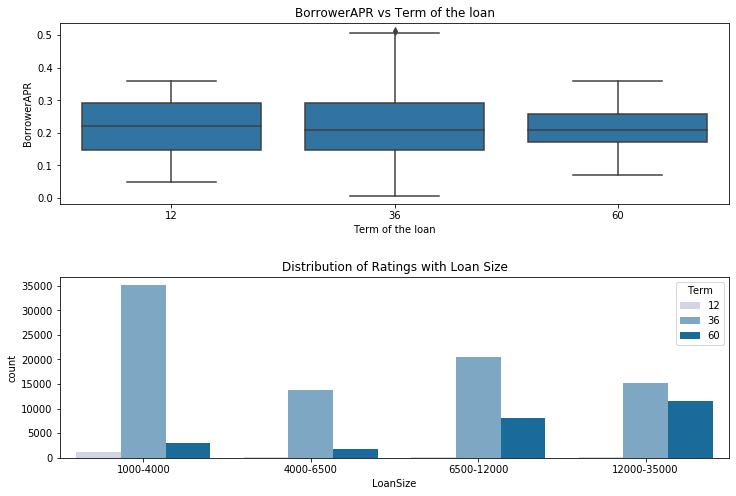

In [184]:
# Borrower APR vs Term of the loan
graph_size(12,8)
plt.subplot(2,1,1)
sns.boxplot(data = loan_clean, x = 'Term', y = 'BorrowerAPR', color = base_color)
graph_label('Term of the loan', 'BorrowerAPR', 'BorrowerAPR vs Term of the loan')

plt.subplot(2,1,2)
sns.set_palette("PuBu", 3)
sns.countplot(data = loan_clean, x = 'LoanSize', hue = 'Term')
plt.title('Distribution of Ratings with Loan Size')

#Adjust the spacing between the subplots:
plt.subplots_adjust(hspace = 0.4)

Interest rates for long term loans are lesser than the shorter term loans. Also, larger loans are taken longer tenures. Larger loans are taken for longer duration. Loans in the range of $ (1000 -4000) are taken mostly for a 3 year tenure.

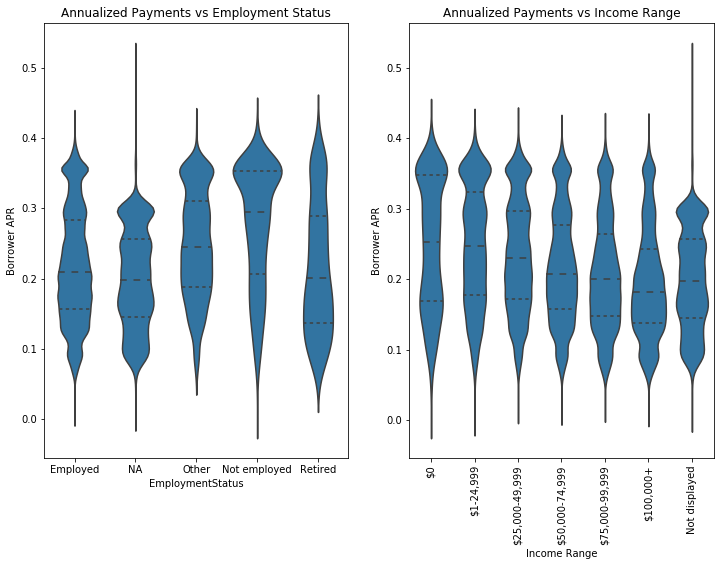

In [225]:
#Borrower APR vs Income Range and Employment Status
graph_size(12,8)
plt.subplot(1,2,1)
sns.violinplot(data = loan_clean, x = 'EmploymentStatus', y = 'BorrowerAPR', color = base_color, inner = 'quartile')
graph_label('EmploymentStatus','Borrower APR' ,'Annualized Payments vs Employment Status')

plt.subplot(1,2,2)
sns.violinplot(data = loan_clean, x = 'IncomeRange', y = 'BorrowerAPR', color = base_color, inner = 'quartile')
plt.xticks(rotation = 90)
graph_label('Income Range', 'Borrower APR','Annualized Payments vs Income Range')

Observation:
1. The unemployed people are paying the highest interest rates, this might be because lenders are sceptical of their paying capacity. Although the retired loanees see the lowest median APR.
2. Needs further investigation because : **Visible anomaly : with increase in income the APR reduces**:

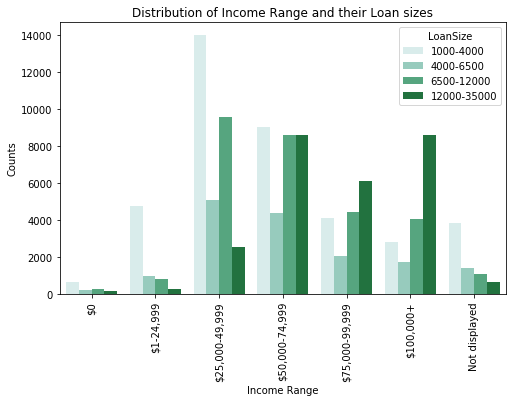

In [245]:
# Investigating whether people with lower incomes are taking larger loans:
graph_size(8,5)
sns.set_palette("BuGn", 4)
sns.countplot(data = loan_clean, x = 'IncomeRange', hue = 'LoanSize')
plt.xticks(rotation = 90)
graph_label('Income Range', 'Counts', 'Distribution of Income Range and their Loan sizes')

From the above graph, we can see that lower income groups take smaller loans. As the income range increases, so does the proportion of larger loans. Loans between $(1000 -4000) is primarily taken by people with incomes between (25,000 - 49,000) dollars. The largest bracket of loans i.e., (12,000 - 35,000) dollars is primarily taken by people with incomes above (100,000) dollars.

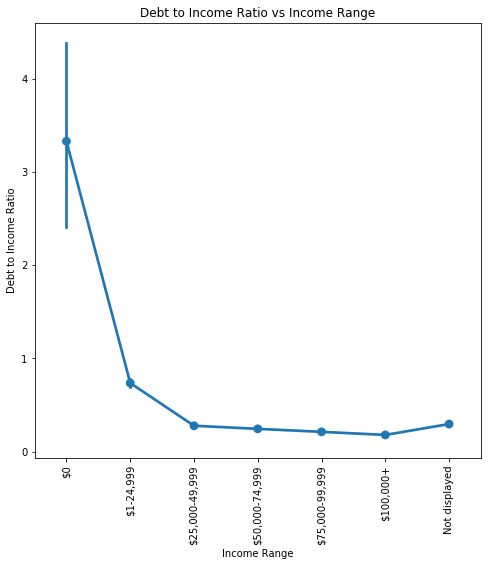

In [246]:
graph_size(8,8)
sns.pointplot(data = loan_clean, x = 'IncomeRange', y = 'DebtToIncomeRatio', color = base_color)
plt.xticks(rotation = 90)
graph_label('Income Range', 'Debt to Income Ratio', 'Debt to Income Ratio vs Income Range')

**The above anomaly remains largely unexplained that with increase in Income levels, the Borrower APR reduces. The Debt to Income ratio of loanees having incomes between $(25,000 to  100,000) is roughly the same**. Since the unemployed section (which consists of students etc.) have no incomes, their DBI is higher.

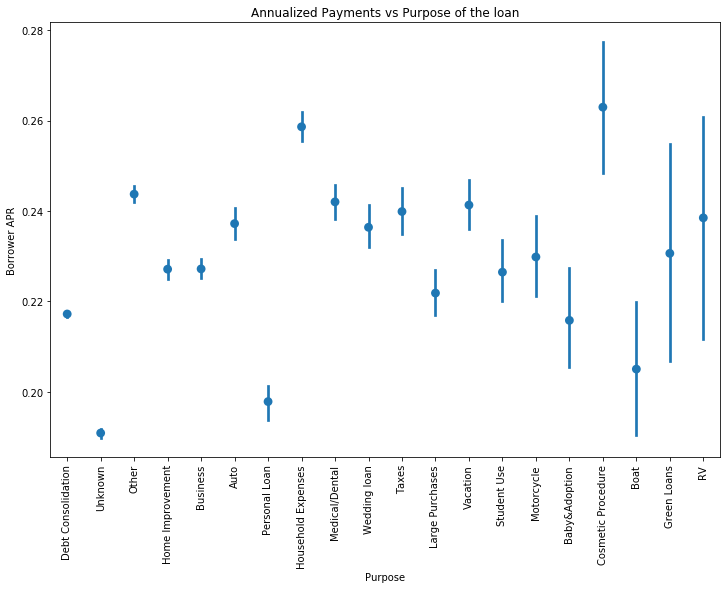

In [247]:
#BorrowerAPR vs PurposeofLoan
graph_size(12,8)
sns.pointplot(data = loan_clean, y = 'BorrowerAPR', x = 'PurposeOfLoan', color = base_color, linestyles ='', order = purpose_order);
plt.xticks(rotation = 90)
graph_label('Purpose', 'Borrower APR', 'Annualized Payments vs Purpose of the loan')

**Cosmetic procedure** attracts the highest interest rates. Interestingly the "Unknown" category has the lowest interest rates. **Debt Consolidation** has lower interest charges than **student loans.** Debt Consolidation interest rates are amongst the lowest rates charged.

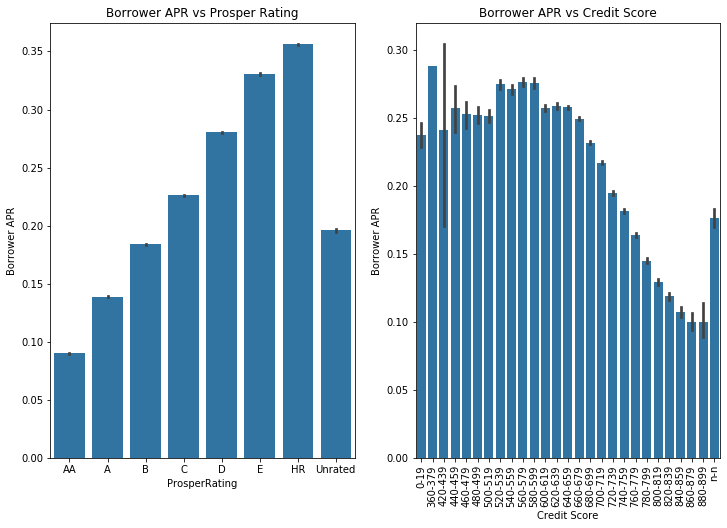

In [240]:
#BorrowerAPR vs ProsperRating and Credit Score
graph_size(12,8)
plt.subplot(1,2,1)
sns.barplot(data = loan_clean, x ='ProsperRating (Alpha)', y = 'BorrowerAPR', color = base_color);
graph_label('ProsperRating', 'Borrower APR', 'Borrower APR vs Prosper Rating')

plt.subplot(1,2,2)
sns.barplot(data = loan_clean, x ='CreditScore', y = 'BorrowerAPR', color = base_color);
plt.xticks(rotation = 90)
graph_label('Credit Score', 'Borrower APR', 'Borrower APR vs Credit Score')

1. This is as one can expect : The average Borrower APR increases with decrease in the quality of ratings.
2. Similar is the case with borrower's credit score : as the credit score increases, the interest rate decreases (it is less risky to lend to trust worthy debtors). There is a small caveat here : for people with credit score in the range of 420 - 519, the interest rates are lower than the ones in the range of 520 - 599.

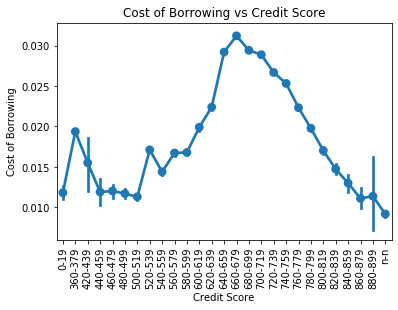

In [237]:
sns.pointplot(data = loan_clean, x = 'CreditScore', y = 'CostofBorrowing', color = base_color)
plt.xticks(rotation = 90)
graph_label('Credit Score', 'Cost of Borrowing', 'Cost of Borrowing vs Credit Score')

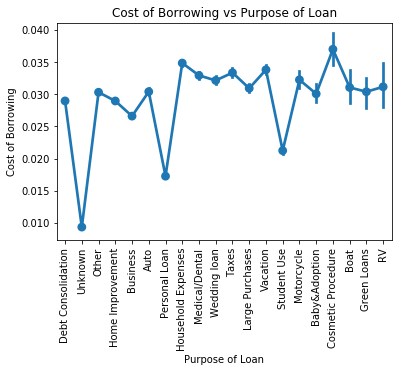

In [238]:
sns.pointplot(data = loan_clean, x = 'PurposeOfLoan', y = 'CostofBorrowing', color = base_color, order = purpose_order)
plt.xticks(rotation = 90)
graph_label('Purpose of Loan', 'Cost of Borrowing', 'Cost of Borrowing vs Purpose of Loan')

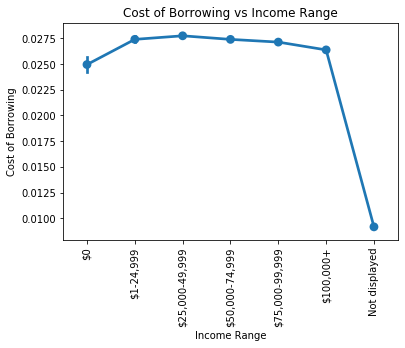

In [239]:
sns.pointplot(data = loan_clean, x = 'IncomeRange', y = 'CostofBorrowing', color = base_color)
plt.xticks(rotation = 90)
graph_label('Income Range', 'Cost of Borrowing', 'Cost of Borrowing vs Income Range')

**Anomaly** : The cost of borrowing increases with increase in credit score from 540 too 699 and then steadily decreases. Cosmetic procedure, Vacation and household expenditure attract the highest expenses. The cost of borrowing has negligle dependency on Income Range, however for the people who haven't disclosed their incomes, it is low comparitatively.

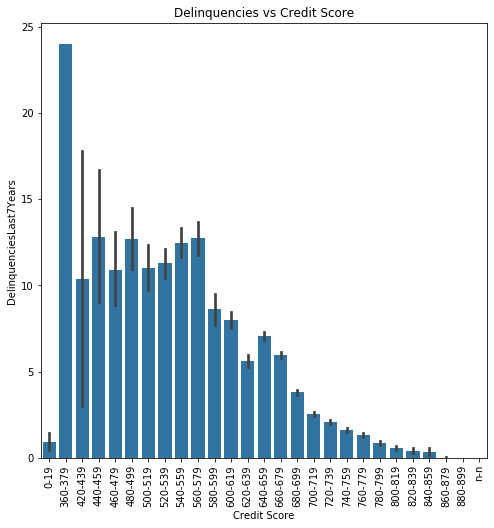

In [190]:
# Are Credit Scores dependent on past delinquencies.
graph_size(8,8)
sns.barplot(data = loan_clean, x = 'CreditScore', y = 'DelinquenciesLast7Years', color = base_color)
plt.xticks(rotation = 90)
graph_label('Credit Score', 'DelinquenciesLast7Years', 'Delinquencies vs Credit Score')

Yes, Credit Scores are largely dependent on past delinquencies.
Let us now explore the bi-variate plots bewteen LoanSize and other variables.

**LoanSize vs Qualitative variables : *EmploymentStatus, IncomeRange, Purpose, Credit Score, Loan Status* and ProsperRating (Alpha)**

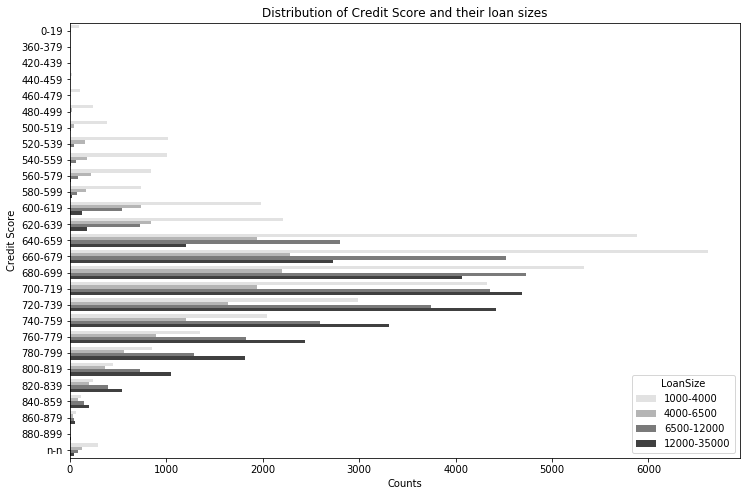

In [219]:
# Credit Score with its loan sizes:
graph_size(12,8)
sns.set_palette("Greys",4)
sns.countplot(data = loan_clean, y = 'CreditScore', hue = 'LoanSize')
graph_label('Counts', 'Credit Score', 'Distribution of Credit Score and their loan sizes')

Loan between $ 12000 - 35000 are given to people with credit scores in between 520 - 879. Smallest category of loans are given to people with 460 - 879.

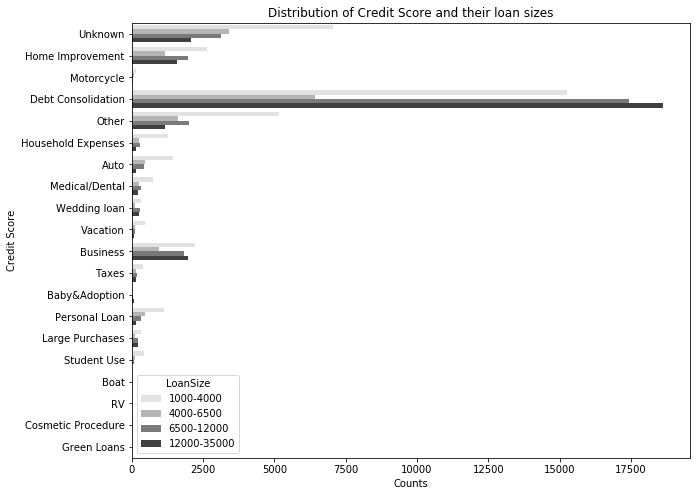

In [220]:
graph_size(10,8)
sns.countplot(data = loan_clean, y = 'PurposeOfLoan', hue = 'LoanSize')
graph_label('Counts', 'Credit Score', 'Distribution of Credit Score and their loan sizes')

Large size loans are mostly taken for Debt Consolidation, Unknown, Business and Home Improvement Purposes. While the smaller loans are taken for Debt Consolidation, Business, Personal loans, Vacation etc.

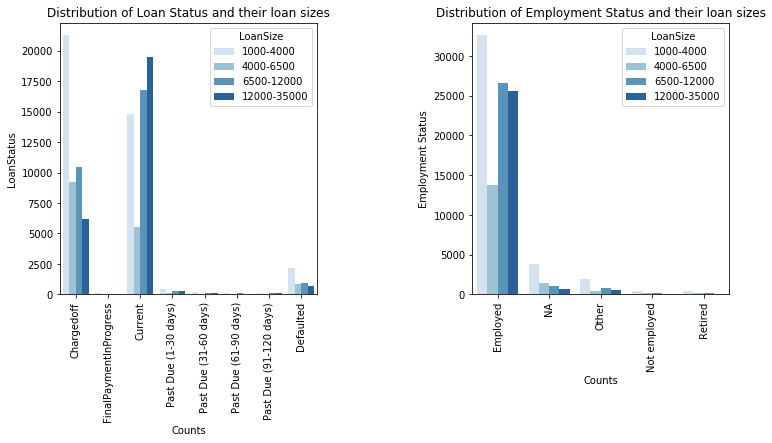

In [221]:
#Loan Size vs Loan Status and Employment Status
graph_size(12,5)
sns.set_palette("Blues", 4)
plt.subplot(1,2,1)
sns.countplot(data = loan_clean, x = 'LoanStatus', hue = 'LoanSize')
plt.xticks(rotation = 90)
graph_label('Counts', 'LoanStatus', 'Distribution of Loan Status and their loan sizes')

plt.subplot(1,2,2)
sns.countplot(data = loan_clean, x = 'EmploymentStatus', hue = 'LoanSize')
plt.xticks(rotation = 90)
graph_label('Counts', 'Employment Status', 'Distribution of Employment Status and their loan sizes')

plt.subplots_adjust(wspace = 0.6)

A major chunk of the large and small sized loans fall under "Charged Off", "Current" and "Defaulted" categories.Also, as we now know that the employed section is the largest loan taker. The distribution of Employed status follows logically. "Not Employed" and "Retired" sections mostly take smaller loans. Another interesting feature to note here is that "NA" section is the next largest loan taker. The status of Employment should be registered and verified by the administration.

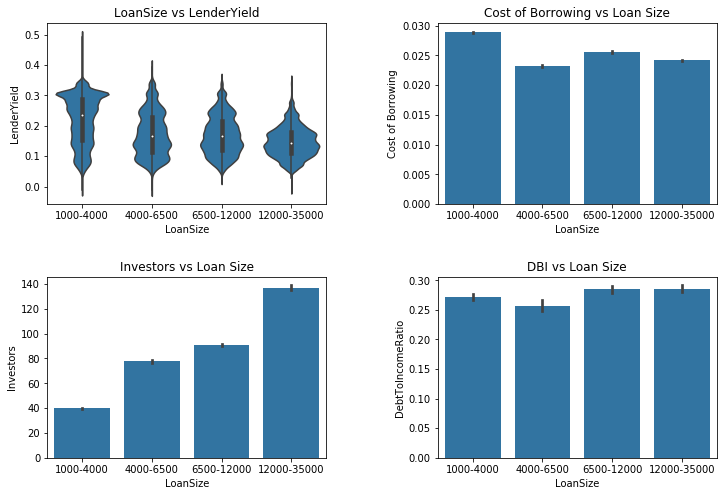

In [218]:
# Loan Size vs Quantitative variables:
graph_size(12,8)
plt.subplot(2,2,1)
sns.violinplot(data = loan_clean, x = 'LoanSize', y = 'LenderYield', color = base_color);
graph_label('LoanSize', 'LenderYield', 'LoanSize vs LenderYield')

plt.subplot(2,2,2)
sns.barplot(data = loan_clean, x = 'LoanSize', y = 'CostofBorrowing', color = base_color);
graph_label('LoanSize', 'Cost of Borrowing', 'Cost of Borrowing vs Loan Size')

plt.subplot(2,2,3)
sns.barplot(data = loan_clean, x = 'LoanSize', y = 'Investors', color = base_color);
graph_label('LoanSize', 'Investors', 'Investors vs Loan Size')

plt.subplot(2,2,4)
sns.barplot(data = loan_clean, x = 'LoanSize', y = 'DebtToIncomeRatio', color = base_color);
graph_label('LoanSize', 'DebtToIncomeRatio', 'DBI vs Loan Size')
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

1. *LenderYield* : With increase in the loan size, the lender's yield decreases. This can be explained from the observations made above i.e., Borrower interest rates are on an average higher for smaller loans and smaller for larger loans. Since Lender's profit is dependent on the interest paid by the borrower, the above observation follows naturally.
2. *CostofBorrowing* : Borrowing smaller loans attracts higher borrowing costs. **This is interesting**.
3. *Investors* : As the loan size increases, the amount of investors too increase. This helps in risk diversification.
4. *DebtToIncomeRatio* : People who have taken larger loans have slightly higher DBI as compared to the smaller loans.

Let us now perform bi-variate visualizations for another important variable *LoanStatus* with QUANTITATIVE VARIABLES : *DebtToIncomeRatio* , *LenderYield*, *CostofBorrowing, Term, Investors*
QUALITATIVE VARIABLES : *CreditScore, ProsperRating (Alpha), CurrentDelinquencies, EmploymentStatus,  Purpose*

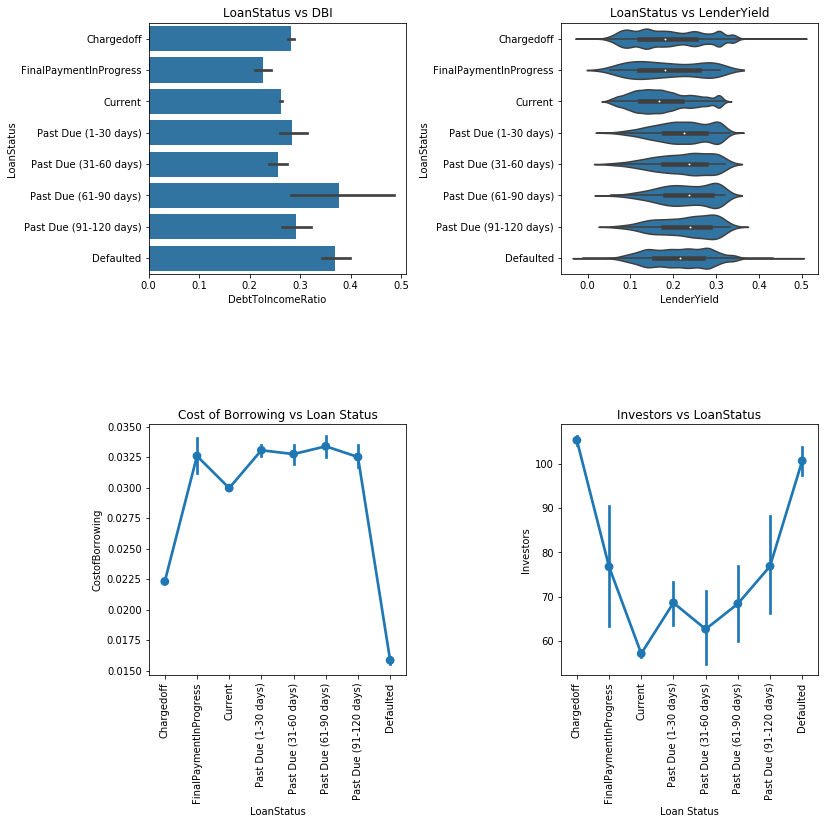

In [211]:
#Loan Status vs Quantitative variables:
graph_size(12,12)
plt.subplot(2,2,1)
sns.barplot(data = loan_clean, y = 'LoanStatus', x = 'DebtToIncomeRatio', color = base_color)
graph_label('DebtToIncomeRatio', 'LoanStatus', 'LoanStatus vs DBI')

plt.subplot(2,2,2)
sns.violinplot(data = loan_clean, y = 'LoanStatus', x = 'LenderYield', color = base_color)
graph_label('LenderYield', 'LoanStatus', 'LoanStatus vs LenderYield')

plt.subplot(2,2,3)
sns.pointplot(data = loan_clean, x = 'LoanStatus', y = 'CostofBorrowing', color = base_color)
plt.xticks(rotation = 90)
graph_label('LoanStatus', 'CostofBorrowing', 'Cost of Borrowing vs Loan Status')

plt.subplot(2,2,4)
sns.pointplot(data = loan_clean, x = 'LoanStatus', y = 'Investors', color = base_color)
plt.xticks(rotation = 90)
graph_label('Loan Status', 'Investors', 'Investors vs LoanStatus')

# Adjusting the vertical and horizontal spacing between the subplots.
plt.subplots_adjust(wspace = 0.6, hspace = 0.6)

1. *DebtToIncomeRatio* : It is highest for loans in Defaulted and Past Due(61-90) days. The DBI of loanees whose loans are charged off, in final payment stages or current status have lower DBI levels than the delayed ones.
2. *LenderYield* : Though lender yields have been high in the past. It increases with increases in delays. Defaulted loans have lower LenderYield than the ones with delays, this is because with delays penalty interests are charged.
3. *Cost of Borrowing* : A sudden drop is seen for loans under default.
4. *Investors* : Loans which have been delayed or defaulted have seen more investors than the loan under current status.

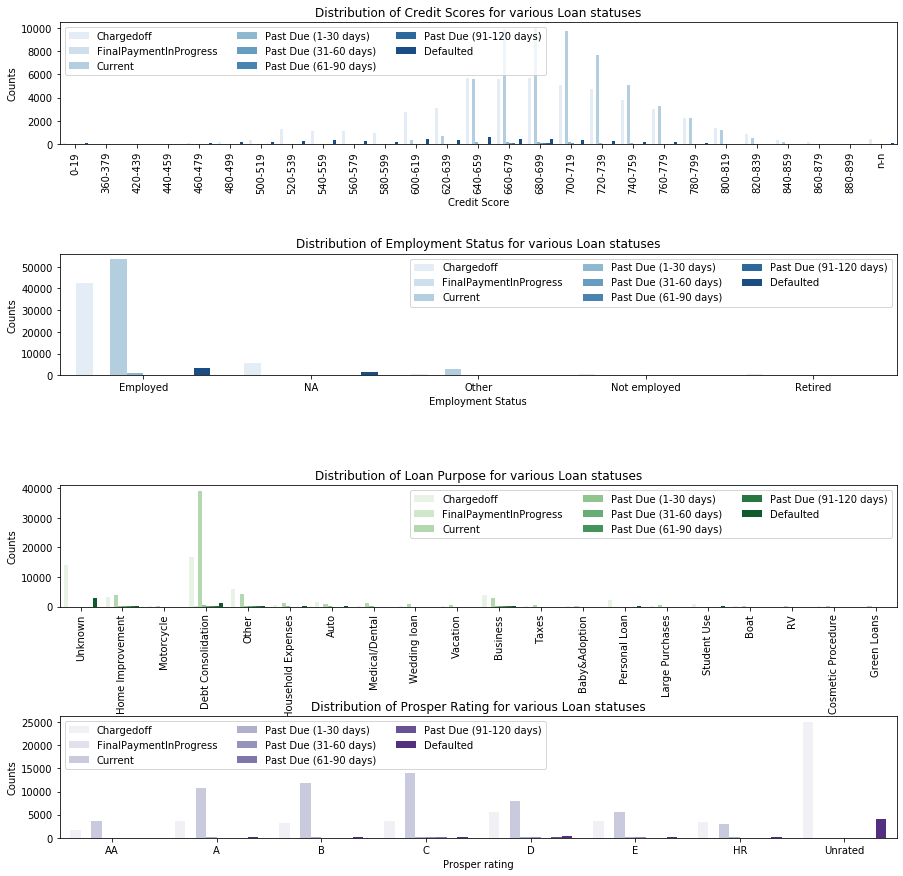

In [188]:
#plotting loan status with CreditScore, ProsperRating (Alpha), EmploymentStatus,  Purpose
graph_size(15,15)
plt.subplot(4,1,1)
sns.countplot(data = loan_clean, x = 'CreditScore', hue = 'LoanStatus', palette = 'Blues')
plt.legend(ncol = 3, loc = 2) # loc 2 means that the legend will appear in the top right corner.
graph_label('Credit Score', 'Counts', 'Distribution of Credit Scores for various Loan statuses')
plt.xticks(rotation = 90)

plt.subplot(4,1,2)
sns.countplot(data = loan_clean, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Blues')
plt.legend(ncol = 3, loc = 1) # loc 1 means that the legend will appear in the top left corner
graph_label('Employment Status', 'Counts', 'Distribution of Employment Status for various Loan statuses')

plt.subplot(4,1,3)
sns.countplot(data = loan_clean, x = 'PurposeOfLoan', hue = 'LoanStatus', palette = 'Greens')
graph_label('Purpose of Loan', 'Counts', 'Distribution of Loan Purpose for various Loan statuses')
plt.legend(ncol = 3, loc = 1)
plt.xticks(rotation = 90)

plt.subplot(4,1,4)
sns.countplot(data = loan_clean, x = 'ProsperRating (Alpha)', hue = 'LoanStatus', palette = 'Purples')
plt.legend(ncol = 3)
graph_label('Prosper rating', 'Counts', 'Distribution of Prosper Rating for various Loan statuses')

#Adjusting the plot for greater vertical space.
plt.subplots_adjust(hspace = 0.9)

1. *Credit Score* : Defaults can be seen in the category between 460 - 799, with maximum defaults seen in people having a credit score of (640-659). 
2. *EmploymentStatus* :Employed section and loanees who haven't provided their employment section see the maximum number of defaults. 
3. *Purpose of Loan* :Debt Consolidation, Unknown purposes register the maximum number of defaults and delays. Though a small segment of Business, Household expenses,Auto, Student use and Personal category loans see defaults too.
4. *Prosper Rating* :Most of the defaulted loans fall under the unrated category. As the quality of rating decreases from A to D, defaults increases. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Summary of the findings from bi-variate visualization:

> BorrowerAPR:
1. *LoanStatus* : Defaulted loans have lower BorrowerAPR than the ones Charged off and the ones with delays. 
2. *LoanSize*: Anomaly : **The BorrowerAPR is higher and more variable for lower range loans**. It decreases with increase in Loan Amount.
3. *CreditScore* and *ProsperRating* :  The average Borrower APR increases with decrease in the quality of ratings.**There is a small caveat here : for people with credit score in the range of 420 - 519, the interest rates are lower than the ones in the range of 520 - 599.**
4. *PurposeOfLoan* : **Interestingly the "Unknown" category has the lowest interest rates. Debt Consolidation has lower interest charges than student loans. Debt Consolidation interest rates are amongst the lowest rates charged.**
5. *Income Range* and *EmploymentStatus* :  **with increase in income the APR reduces.** And this not a factor of higher loan sizes or debt to Income Ratios.

> LoanStatus :
6. Interaction of ***LoanStatus*** with various variables : $Credit Score$ People between 460 - 799 form a potential risk group with (640 -659) witnessing highest defaults. This should be rectified. People with better credit score should have lower defaults. $PurposeofLoan$ **Debt Consolidation and Unknown** loans form another risk factor in giving out loans. $ProsperRating (Alpha)$ **Unrated loans** have led to maximum defaults. This risk can be should be eliminated.
7. Interaction of ***LoanStatus*** with : $DebtToIncomeRatio$ : Delayed and Defaulted loans generally have higher DBI. $LenderYield$ : Increase in delays have generally led to higher Lender yields. This can be explained by $Cost of Borrowing$ : which increases with increase in delays, however for loans under defaulted category, cost of borrowing falls(this is because such loans were never paid up). $Investors$ : Charged off, Delayed and Defaulted loans in the past have seen higher number of investors.

> Loan Size :
8. *LenderYield* : With increase in the loan size, the lender's yield decreases. 
9. *CostofBorrowing* : Borrowing smaller loans attracts higher borrowing costs. **This is interesting**.
10. *Investors* : As the loan size increases, the amount of investors too increase. This helps in risk diversification.
11. *DebtToIncomeRatio* : People who have taken larger loans have slightly higher DBI as compared to the smaller loans.
12. A major chunk of the large and small sized loans fall under "Charged Off", "Current" and "Defaulted" categories. Also, as we now know that the employed section is the largest loan taker. **"Not Employed" and "Retired" sections mostly take smaller loans**. Another interesting feature to note here is that **"NA"** section is the next largest loan taker. The status of Employment should be registered and verified by the administration.
13. Large size loans are mostly taken for Debt Consolidation, Unknown, Business and Home Improvement Purposes. While the smaller loans are taken for Debt Consolidation, Business, Personal loans, Vacation etc. Loan between (12000 - 35000) dollars are given to people with credit scores in between 520 - 879. Smallest category of loans are given to people with 460 - 879.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes:
1. Credit Scores are largely dependent on past delinquencies.
2. The **cost of borrowing increases with increase in credit score from 540 too 699 and then steadily decreases**. **Cosmetic procedure, Vacation and household expenditure attract the highest borrowing charges**. The cost of borrowing has negligle dependency on Income Range, however for the people who haven't disclosed their incomes, it is low comparitatively.
3. The Debt to Income ratio of loanees having incomes between $(25,000 to 100,000) is roughly the same.
4.  As the income range increases, so does the proportion of larger loans. Loans between (1000 -4000) dollars is primarily taken by people with incomes between (25,000 - 49,000) dollars. The largest bracket of loans i.e., (12,000 - 35,000) dollars is primarily taken by people with incomes above (100,000) dollars.
5. Also, larger loans are taken longer tenures. Larger loans are taken for longer duration. Loans in the range of (1000 -4000) dollars are taken mostly for a 3 year tenure.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

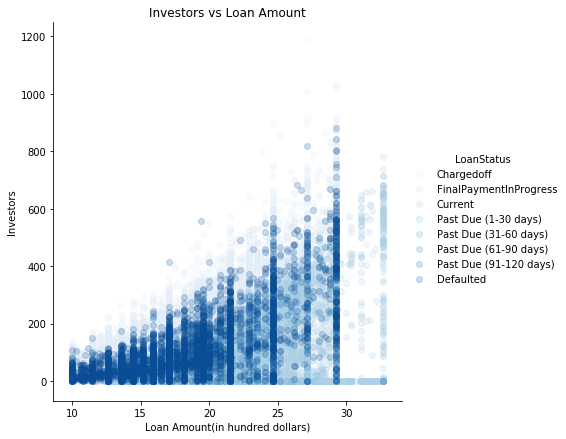

In [248]:
# Visualizing the relationship between Investors, Loan Amount and the loan status
g = sns.FacetGrid(data = loan_clean, hue = 'LoanStatus',height = 6, palette = "Blues")
g.map(plt.scatter, 'Loan_cubic', 'Investors', alpha = 0.2)
g.add_legend()
graph_label('Loan Amount(in hundred dollars)', 'Investors', 'Investors vs Loan Amount')

This confirms what we explored in Bi-variate relationships : With increase in loan amount, the number of investors increases and the defaults increases.

In [101]:
# Creating a function to produce heat map : (taken from Example project of udacity)
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    yield_edges = np.arange(loan_clean.LenderYield.min(), loan_clean.LenderYield.max()+ 0.01, 0.01)
    APR_bins = np.arange(loan_clean.BorrowerAPR.min(), loan_clean.BorrowerAPR.max() +0.01, 0.01)
    plt.hist2d(x, y, bins = [APR_bins, yield_edges], cmap = palette, cmin = 0.5)
   

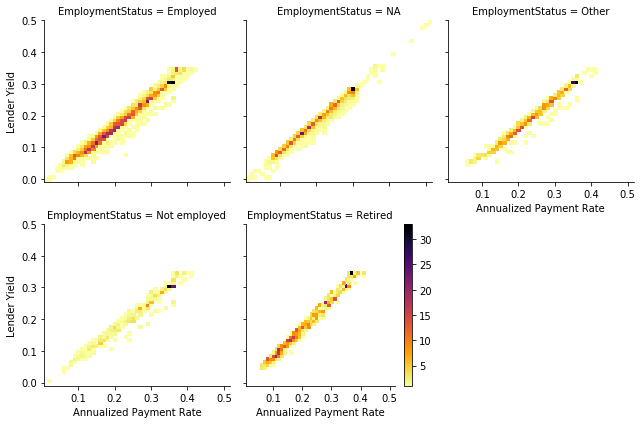

In [250]:
# creating faceted heat maps for different Employment categories.
g = sns.FacetGrid(data = loan_clean, col = 'EmploymentStatus', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'BorrowerAPR', 'LenderYield', color = 'inferno_r')
g.set_xlabels('Annualized Payment Rate')
g.set_ylabels('Lender Yield')
plt.colorbar()

plt.show()

As we have seen before that APR and Lender's Yield share a strong positive correlation. Through this graph our notion that "unemployed" category is paying higher interest rates is solidified (the scatter plot is steeper for them).

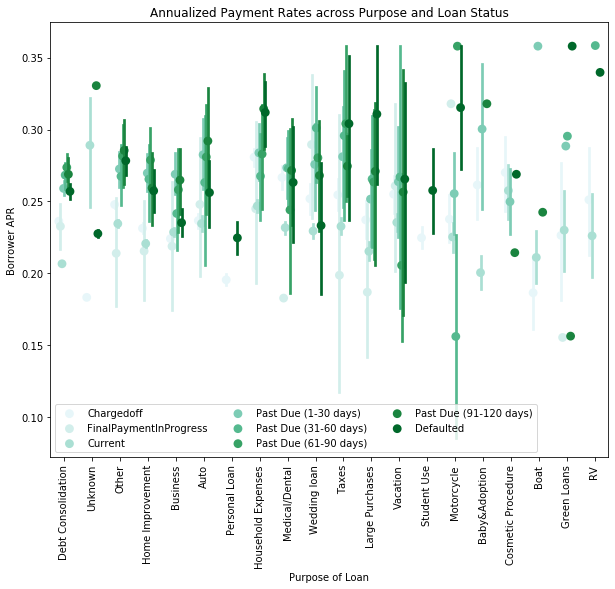

In [266]:
# Next visualizing the relationship between APR and Purpose of Loan given their loan statuses
graph_size(10,8)
sns.pointplot(data = loan_clean, x = 'PurposeOfLoan', y = 'BorrowerAPR', hue = 'LoanStatus',
           palette = 'BuGn', linestyles = '', dodge = 0.4, order = purpose_order);
plt.xticks(rotation = 90) 

#Re-arranging legend to reduce over-lapping
plt.legend(ncol = 3)
graph_label('Purpose of Loan', 'Borrower APR', 'Annualized Payment Rates across Purpose and Loan Status')

1. Borrower APR is different for different categories of loans.
2. Delays in payment for Household expenses, Taxes, Large purchases, Green loans, RVs see higher charges. These loans might be risky but **Debt Consolidation and loans for unknown purposes** are the riskier groups.

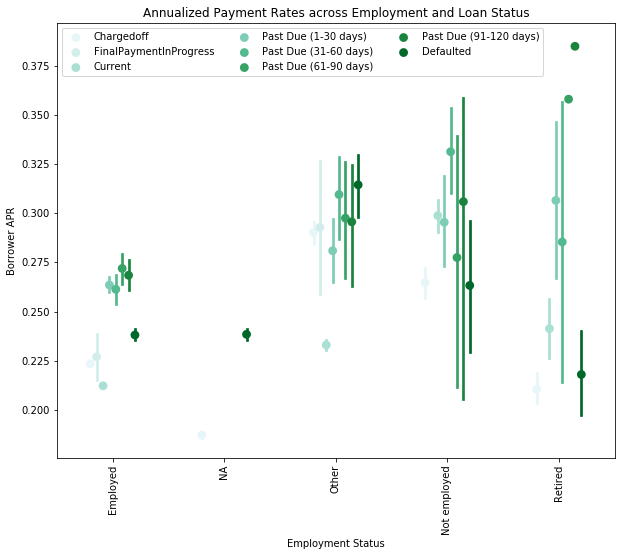

In [263]:
graph_size(10,8)
sns.pointplot(data = loan_clean, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'LoanStatus', palette = 'BuGn', linestyles = '', dodge = 0.4)

plt.xticks(rotation = 90)
#Re-arranging legend to reduce over-lapping
plt.legend(ncol = 3)

graph_label('Employment Status', 'Borrower APR', 'Annualized Payment Rates across Employment and Loan Status')

Employed people are charged lesser in case of delays. The section that pays up the highest charges are the "Not employed" sections.

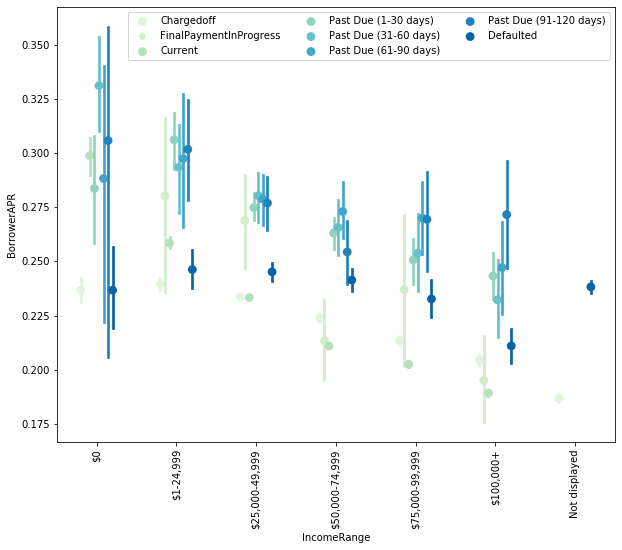

In [76]:
graph_size(10,8)
sns.pointplot(data = loan_clean, x = 'IncomeRange', y = 'BorrowerAPR', hue = 'LoanStatus', palette = 'GnBu', linestyles = '', dodge = 0.4)

plt.xticks(rotation = 90)
#Re-arranging legend to reduce over-lapping
plt.legend(ncol = 3)

**Lower income groups are paying higher charges for the same status of the loan.**

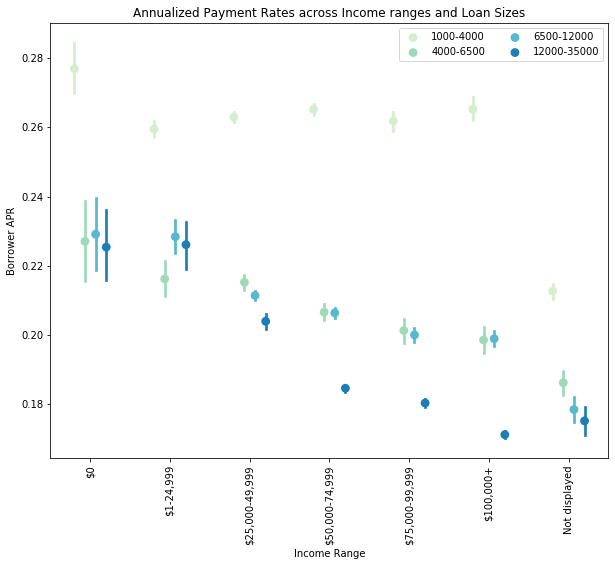

In [261]:
graph_size(10,8)
sns.pointplot(data = loan_clean, x = 'IncomeRange', y = 'BorrowerAPR', hue = 'LoanSize', palette = 'GnBu', linestyles = '', dodge = 0.4)

plt.xticks(rotation = 90)
#Re-arranging legend to reduce over-lapping
plt.legend(ncol = 2)

graph_label('Income Range', 'Borrower APR', 'Annualized Payment Rates across Income ranges and Loan Sizes')

Anomaly : **For the same sized loans, people with lower incomes pay higher interest rates.**

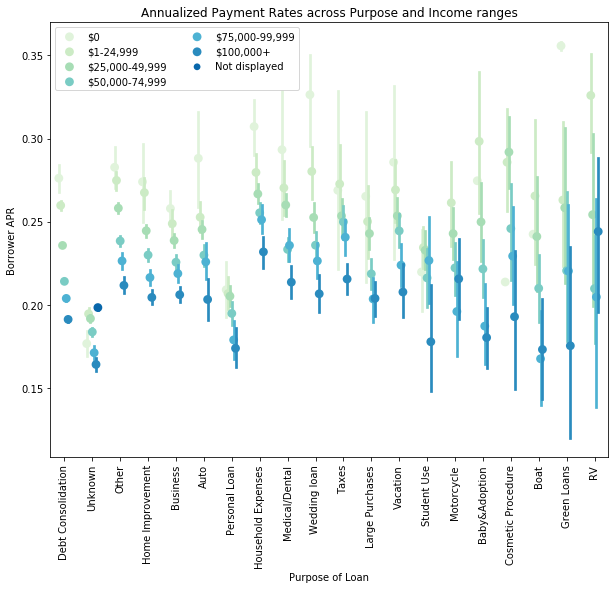

In [260]:
# Is it baised towards lower income groups?
graph_size(10,8)
sns.pointplot(data = loan_clean, x = 'PurposeOfLoan', y = 'BorrowerAPR', hue = 'IncomeRange', palette = 'GnBu', linestyles = '', dodge = 0.4, order = purpose_order)

plt.xticks(rotation = 90)
#Re-arranging legend to reduce over-lapping
plt.legend(ncol = 2)
graph_label('Purpose of Loan', 'Borrower APR', 'Annualized Payment Rates across Purpose and Income ranges')

The above graph confirms our bi-variate analysis above :
1. The Borrower APR is lower for people with higher incomes.
2. The Borrower APR is amongst the lowest for **Debt Consolidation, Unknown, Personal Loans, Business and Student use**. However the gradation in the graph above shows that for any purpose of the loan, people with lower incomes pay higher interest rates.

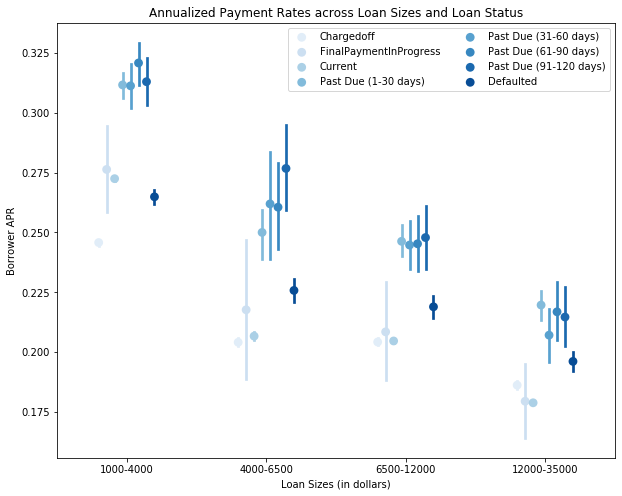

In [259]:
graph_size(10,8)
sns.pointplot(data = loan_clean, x = 'LoanSize', y = 'BorrowerAPR', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '' ,dodge = 0.4); 

#Re-arranging legend to reduce over-lapping
plt.legend(ncol = 2, loc = 1)
graph_label('Loan Sizes (in dollars)', 'Borrower APR', 'Annualized Payment Rates across Loan Sizes and Loan Status')

Borrower APR decreases with increase in loan sizes and has been the lowest for defaulted loans. This is because borrower's never paid up their dues. However, APRs (Interest rates + charges) increases with increase in delays, with the highest for *Past Due(61-120) days*.

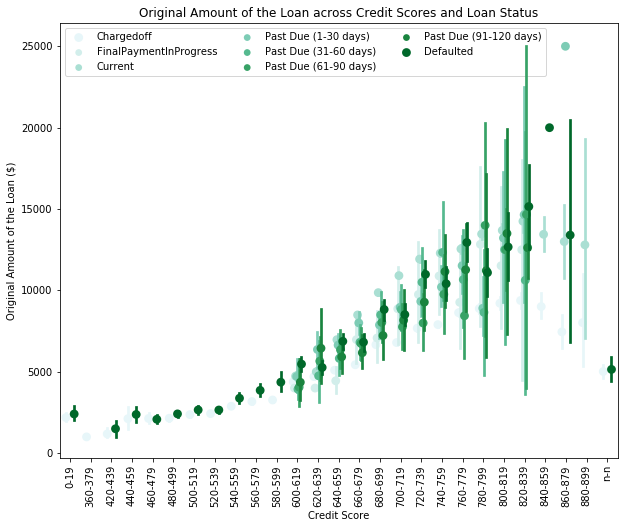

In [257]:
graph_size(10,8)
sns.pointplot(data = loan_clean, x = 'CreditScore', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           palette = 'BuGn', linestyles = '', dodge = 0.4);
plt.xticks(rotation = 90) 

#Re-arranging legend to reduce over-lapping
plt.legend(ncol = 3)
graph_label('Credit Score', 'Original Amount of the Loan ($)', 'Original Amount of the Loan across Credit Scores and Loan Status')

**Very interesting observation** : With increase in Credit Score, delayed payment of interest/ principal amount increases.
As the credit score increases, defaults take place for larger loans. However the loan amount does not go beyond $ 20,000.

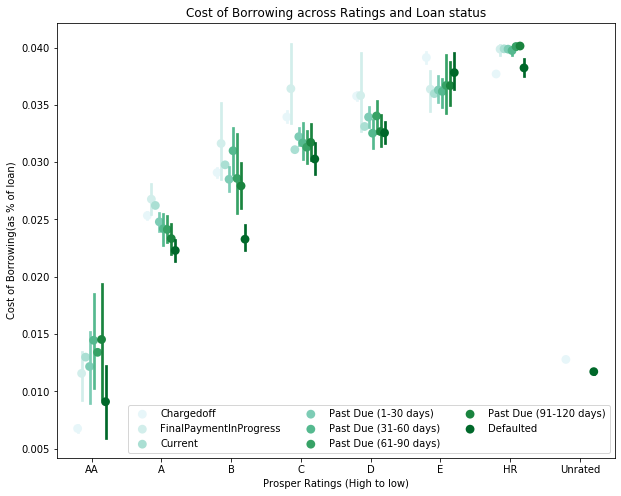

In [256]:
# Relationship between Cost of Borrowing and Loan ratings with their Loan status.
graph_size(10,8)

sns.pointplot(data = loan_clean, x = 'ProsperRating (Alpha)', y = 'CostofBorrowing', hue = 'LoanStatus',
           palette = 'BuGn', linestyles = '', dodge = 0.4);

#Re-arranging legend to reduce over-lapping
plt.legend(ncol = 3)

graph_label('Prosper Ratings (High to low)', 'Cost of Borrowing(as % of loan)', 'Cost of Borrowing across Ratings and Loan status')


As we can see from the above graph that the cost of borrowing increases with decrease in the quality of rating however it has generally been higher for charged off and current loans than the delayed ones.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> What affects the borrower's APR(or interest rate)?
1. Income Range and Employment Status play a major role in determing the interest rates.
2. Credit Ratings and 
Prosper ratings.
3. Loan Sizes.
Each of these are themselves dependent on a number of factors as explored above.


> What factors affect the loan outcome status:
1. Purpose of the Loan
2. Unrated loans point towards potential risk factors and should be rectified.


>  Are there differences on how large the original loan amount was?
1. With increase in loan size, the number of investors and defaults increase.
2. **With increase in loan sizes, the interest rates decrease.**
3. With increase in loan sizes, the tenure of the loan increases.


### Were there any interesting or surprising interactions between features?

> Interesting features : 
1. **For the same sized loans, people with lower incomes pay higher interest rates.**
2. For the same purpose of the loan, people with lower incomes pay higher interest rates.
3. **Lower income groups are paying higher charges for the same status of the loan.

**These relationships are potentially due to **Unrated, Unknown purposes and Lack of employment status and income range** of the loanees. This anomaly can be rectified by addressing these.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!